## Crash Data Wrangling Jupyter Notebook

**Author:** Eric Englin, Meredith Raymer, and Sophie Kaye

**Date:** 6/23/22

**Purpose:** This notebook will clean pre-combined IMARS data and filter data tables for data attributes to be used in analysis. The smaller cleaned tables are then combined to create a dataframe that is joinable with the reciprocal CDS dataset.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from shapely.geometry import Point, LineString, Polygon

In [2]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing\Data"
os.chdir(myworkingdirectory)

In [3]:
path = './New IMARS'

files = os.listdir(path)

for f in files:
    print(f)

IMARS 2012 - 2021.xlsx


In [4]:
imars_crash = pd.read_excel("./New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Location")
imars_passenger = pd.read_excel("./New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Person")
imars_vehicle = pd.read_excel("./New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Vehicle")
imars_crash_details = pd.read_excel("./New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Classification")

In [5]:
imars_crash.shape

(17828, 32)

In [6]:
imars_passenger.shape

(27932, 29)

In [7]:
imars_vehicle.shape

(23577, 51)

In [8]:
imars_crash_details.shape

(16304, 24)

In [9]:
# note that crash_details and crash don't have the same number of entries to begin with

In [10]:
imars_passenger.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Driver_Action',
       'Driver_Condition', 'Driver_Distraction', 'Suspect_Alcohol',
       'Alcohol_Test', 'Alcohol_Test_Result_1', 'Alcohol_Test_Result_2',
       'Suspect_Drugs', 'Drug_Test', 'Violations_Issued', 'Seat_Position',
       'Injury_Severity', 'Air_Bag_Deployed', 'Ejection',
       'Injury_Transported_By', 'Safety_Equipment_Used', 'Vehicle_number',
       'Injured_transported_by', 'Non_motorist_safety_equipment',
       'Non_motorist_action_circumstance_prior_to_crash',
       'Non_motorist_action_circumstance_at_time_of_crash',
       'Non_motorist_condition_at_time_of_crash', 'Non_motorist_distraction',
       'Non_motorist_location_at_time_of_crash', 'Pedestrian_Type',
       'Pedestrian_Type_Detail', 'Involvement'],
      dtype='object')

In [11]:
imars_crash.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Linked_Address_Classification',
       'City_Town_Park_Location', 'State', 'County', 'Direction',
       'Linked_Street_Number', 'Linked_Common_Name', 'Street_Type',
       'Direction.1', 'NEAR_Distance_to_MI', 'NEAR_Direction_To',
       'NEAR_Direction', 'NEAR_route_street_road_name', 'NEAR_Road_Type',
       'NEAR_Direction.1', 'AT_Intersection_route_street_road_DIRECTION',
       'At_Intersecting_route_street_road_name', 'AT_Road_Type',
       'AT_Direction', 'Mile_Marker', 'Latitude', 'Longitude', 'Region',
       'State_Zone', 'Park', 'Site', 'Place', 'Point',
       'Road_Type_Classification', 'Linked_Address'],
      dtype='object')

In [12]:
imars_crash_details.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Number_of_Vehicles_Involved',
       'Injury_or_Fatal_Crash', 'Investigated_at_Scene', 'Hit_and_Run',
       'Non_Motor_Vehicl_Property_Damage', 'Amount_of_Property_Damage',
       'First_Harmful_Event_Type', 'First_Harmful_Event',
       'Location_of_First_Harmful_Event', 'Weather', 'Roadway_Condition',
       'Lighting', 'School_Bus_related', 'AS_Road_Circumstance',
       'Environmental_Contributing_Circumstances', 'Work_Zone_Related',
       'Work_Zone_Workers_Present', 'Work_Zone_Location',
       'Law_Enforcement_Present_at_Work_Zone', 'Relation_to_Junction',
       'Type_of_Intersection', 'Manner_of_Collision'],
      dtype='object')

In [13]:
imars_vehicle.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Vehicle_Number',
       'Number_of_Occupants', 'Vehicle_Towed', 'Insurance_verified',
       'Initial_Impact_Point', 'Most_Damaged_Area', 'Extent_of_Damage',
       'Direction_of_Travel_Prior_to_Crash', 'Posted_Speed',
       'First_Event_Type', 'First_Event', 'Second_Event_Type', 'Second_Event',
       'Third_Event_Type', 'Third_Event', 'Fourth_Event_Type', 'Fourth_Event',
       'Motor_Vehicle_Unit_Type', 'Vehicle_Owner', 'Vehicle_Type',
       'Non_Commercial_Trailer_Style', 'Emergency_Vehicle_Use',
       'Emergency_Equipment_Activated', 'Special_Function_of_MV_in_Transport',
       'Motor_Vehicle_Contributing_Circumstance',
       'Vehicle_Maneuver_Action_Prior_to_Crash', 'Road_Surface', 'Grade',
       'Roadway_Alignment', 'Total_Number_of_Lanes', 'Traffic_Control',
       'Traffic_Control_Working_Properly', 'Roadway_Description',
       'Commercial_Non_Commercial', 'Number_of_Axles', 'Gross_Vehicle_Weight',
       'Combination_GVW', 

# General Data Cleaning
Note that there are crashes with randomly missing park, region, and/or roadway

### CHECK FOR & REMOVE CRASHES WITH MISSING RECORD NUMBERS

In [14]:
imars_crash.shape

(17828, 32)

In [15]:
imars_crash.dropna(subset=['IMARS_Record_No']).shape

(17827, 32)

In [16]:
imars_crash = imars_crash.dropna(subset=['IMARS_Record_No'])

In [17]:
imars_passenger.shape

(27932, 29)

In [18]:
imars_passenger.dropna(subset=['IMARS_Record_No']).shape

(27931, 29)

In [19]:
imars_passenger = imars_passenger.dropna(subset=['IMARS_Record_No'])

In [20]:
imars_vehicle.shape

(23577, 51)

In [21]:
imars_vehicle.dropna(subset=['IMARS_Record_No']).shape

(23576, 51)

In [22]:
imars_vehicle = imars_vehicle.dropna(subset=['IMARS_Record_No'])

In [23]:
imars_crash_details.shape

(16304, 24)

In [24]:
imars_crash_details.dropna(subset=['IMARS_Record_No']).shape

(16303, 24)

In [25]:
imars_crash_details = imars_crash_details.dropna(subset=['IMARS_Record_No'])

### REMOVE DUPLICATES

In [26]:
imars_crash = imars_crash.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash.shape

(15130, 32)

In [27]:
imars_crash_details = imars_crash_details.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash_details.shape

(15302, 24)

In [28]:
# note that crash and crash details still don't have the same number of entries (although they did with the older archived input data...)

### REVERT FLIPPED LAT/LONG

In [29]:
need_revert = imars_crash['Latitude'].abs() > 70
imars_crash.loc[need_revert, ['Latitude', 'Longitude']] = (imars_crash.loc[need_revert, ['Longitude', 'Latitude']].values)

### ADJUST SIGNS TO CORRECT HEMISPHERE

In [30]:
imars_crash.loc[imars_crash.Latitude < 0,"Latitude"] = imars_crash['Latitude']*(-1)
imars_crash.loc[imars_crash.Longitude > 0,"Longitude"] = imars_crash['Longitude']*(-1)

# Add Parks to Crash Table

**Note:** IMARS does not have park units with each crash, so these will have to be added using the Latitude and Longitude fields in the imars_crash dataset. 

In [31]:
imars_crash.shape

(15130, 32)

In [32]:
imars_crash.dropna(subset=['Park']).shape

(12205, 32)

In [33]:
imars_crash_parks = imars_crash.dropna(subset=['Park'])
imars_crash_parks.shape

(12205, 32)

In [34]:
imars_crash.loc[imars_crash['Park'].isnull()==False].shape

(12205, 32)

In [35]:
# 12205 of 15130 crash entries have the park already explicitly identified

In [36]:
imars_crash.loc[imars_crash['Park'].isnull()].shape

(2925, 32)

In [37]:
# 2925 of the 15130 crash entries have no park identification

In [38]:
imars_crash_coords = imars_crash.loc[imars_crash['Park'].isnull()].dropna(subset=['Latitude','Longitude'])
imars_crash_coords.shape

(591, 32)

In [39]:
# of the 2925 crash entries without park identification, 591 have lat/long coordinates from which park can be assigned using the shapefile
# the sum of crashes with pre-identified parks and crashes that can be assigned a park using lat/long coordinates 
# results in the following total of possible usable crash entries after the spatial join:
12205+591

12796

In [40]:
imars_crash_noparks = imars_crash.loc[imars_crash['Park'].isnull()]
imars_crash_noparks_nolat = imars_crash_noparks.loc[imars_crash_noparks['Latitude'].isnull()]
imars_crash_noparks_nocoords = imars_crash_noparks_nolat.loc[imars_crash_noparks_nolat['Longitude'].isnull()]
imars_crash_noparks_nocoords.shape

(2334, 32)

In [61]:
# 2334 of the 15130 crashes entries have no park identification or lat/long coordinates
2925-591

2334

In [42]:
mask = imars_crash_noparks_nocoords.loc[:,['Linked_Common_Name','Linked_Address','NEAR_route_street_road_name',
                                           'At_Intersecting_route_street_road_name']].notnull()
imars_noparks_nocoords_someinfo = imars_crash_noparks_nocoords.loc[mask.any(axis=1)]
imars_noparks_nocoords_someinfo.shape

(109, 32)

In [43]:
# of the 2334 crash entries without park identification or lat/long coordinates, 109 have other identifiable information 
# (e.g., roadway name) which could be used to identify the park name
# print file containing only this subset of crashes for manual park identification
imars_noparks_nocoords_someinfo.to_csv("./IMARS_noparks_nocoords_someinfo.csv",index=False)

## spatial join to assign park names

In [44]:
imars_crash_coords_geo=gpd.GeoDataFrame(imars_crash_coords, geometry=gpd.points_from_xy(imars_crash_coords.Longitude, 
                                                                             imars_crash_coords.Latitude))

In [45]:
filename = "./shapefiles/NPS_-_Land_Resources_Division_Boundary_and_Tract_Data_Service.geojson"
file = open(filename)
parks = gpd.read_file(file)

In [46]:
imars_crash_coords_geo.crs = "EPSG:4326"

In [47]:
parks = parks.to_crs(epsg=4326)
parks['geometry']=parks['geometry'].buffer(0.01)

imars_crash_coords_geo_withparknames=gpd.sjoin(imars_crash_coords_geo,parks,how="left", predicate='intersects')
imars_crash_coords_geo_withparknames.head()

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_20300\3993503279.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks['geometry']=parks['geometry'].buffer(0.01)


,IMARS_Record_No,Crash_Date_Time,Linked_Address_Classification,City_Town_Park_Location,State,County,Direction,Linked_Street_Number,Linked_Common_Name,Street_Type,...,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length
439,NP14039836,20140513 13:30:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lands,Preliminary data. Contact the Land Resources P...,Olympic,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,d568927b-56f4-4f49-a52a-b8ab9f7676a3,8.203591e+09,1.158605e+06
443,NP14049772,20140607 14:42:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lands,Preliminary data. Contact the Land Resources P...,Olympic,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,d568927b-56f4-4f49-a52a-b8ab9f7676a3,8.203591e+09,1.158605e+06
444,NP14060606,20140625 20:40:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lands,Preliminary data. Contact the Land Resources P...,Olympic,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,2020-01-09T22:16:03+00:00,SCarlton@nps.gov_nps,d568927b-56f4-4f49-a52a-b8ab9f7676a3,8.203591e+09,1.158605e+06
497,NP16023660,20160312 16:32:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Big Bend,2022-01-06T10:41:22+00:00,WASO,2022-01-06T10:41:22+00:00,WASO,32b17c0c-12d0-4ffb-82fd-fb570aa92382,4.329894e+09,4.621458e+05
508,NP16029926,20160326 20:00:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Blue Ridge Parkway,2022-01-06T10:41:13+00:00,WASO,2022-01-06T10:41:13+00:00,WASO,a8ef8bcf-aaa2-4623-a8f6-1d93fe31f945,6.422579e+08,2.287707e+06


In [48]:
imars_crash_coords_geo_withparknames2 = imars_crash_coords_geo_withparknames.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash_coords_geo_withparknames2.shape

(591, 53)

In [49]:
# all 591 crash entries were processed in the spatial join

In [50]:
imars_crash_withparknames = pd.DataFrame(imars_crash_coords_geo_withparknames2.drop(columns='geometry'))
imars_crash_withparknames['Park']= imars_crash_withparknames['UNIT_CODE']
imars_crash_withparknames.shape

(591, 52)

In [51]:
imars_crash_withparknames_NoDupsorNulls = imars_crash_withparknames.dropna(subset=['Park'])
imars_crash_withparknames_NoDupsorNulls.shape

(505, 52)

In [52]:
# of the 591 crash entries without parks identified, 505 now have parks assigned from spatial join
# so we expect the total ("expanded") dataset to be:
12205+505

12710

In [53]:
imars_crash_expanded = pd.concat([imars_crash_parks,imars_crash_withparknames_NoDupsorNulls])
imars_crash_expanded.shape

(12710, 52)

In [54]:
# check to make sure all entries in combined dataset contain park assignments 
imars_crash_expanded = imars_crash_expanded.dropna(subset=['Park'])
imars_crash_expanded.shape

(12710, 52)

In [55]:
# check to make sure no duplicate crashes in combined dataset
imars_crash_expanded = imars_crash_expanded.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash_expanded.shape

(12710, 52)

### Add in crashes with park names manually identified via unmistakable roadway names

In [56]:
# open file Chris populated in which park names were manually added to crash data containing identifiable info (e.g., road name)
imars_new_parknames = pd.read_csv("./Output Data/archive/IMARS_noparks_nocoords_someinfo_parks_filled.csv")

In [57]:
# remove any entries for which park names were not able to be identified
imars_new_parknames = imars_new_parknames.dropna(subset=['Park'])
imars_new_parknames.shape

(80, 32)

In [58]:
# 80 of 109 crashes were able to have park names manually added using road names and should be combined with crash data 
# containing park names from original data and spatial assignment for a total of 12790 crashes in the final dataset

In [59]:
imars_crash_expanded = pd.concat([imars_crash_expanded,imars_new_parknames])
imars_crash_expanded.shape

(12790, 52)

In [60]:
# check to make sure there are no duplicates in final dataset
imars_crash_expanded = imars_crash_expanded.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash_expanded.shape

(12790, 52)

## Analyze crashes dropped from original dataset

In [124]:
imars_crash_orig_NoDupsorNulls = pd.read_excel("./New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Location")
imars_crash_orig_NoDupsorNulls = imars_crash_orig_NoDupsorNulls.dropna(subset=['IMARS_Record_No'])
imars_crash_orig_NoDupsorNulls = imars_crash_orig_NoDupsorNulls.drop_duplicates(subset=['IMARS_Record_No'])
imars_crash_orig_NoDupsorNulls['Crash_Date_Time']=pd.to_datetime(imars_crash_orig_NoDupsorNulls['Crash_Date_Time'], format='%Y%m%d %H:%M:%S:%f')
imars_crash_orig_NoDupsorNulls['CRASH_YEAR'] = imars_crash_orig_NoDupsorNulls['Crash_Date_Time'].dt.strftime('%Y')
all_crashes_by_year = imars_crash_orig_NoDupsorNulls['CRASH_YEAR'].value_counts().sort_index().reset_index()
all_crashes_by_year.columns =['Year', 'Crashes']
all_crashes_by_year['Crashes'].sum()

15130

In [125]:
all_crashes_by_year

,Year,Crashes
0,2012,84
1,2013,326
2,2014,32
3,2015,15
4,2016,1671
5,2017,1779
6,2018,3021
7,2019,3158
8,2020,2423
9,2021,2621


In [130]:
all_crashes_by_year.to_csv("./Output Data/IMARS_all_crashes_annual.csv", index= False)

In [126]:
# dataframe of dropped crashes should have the following number of rows:
15130-12790

2340

In [127]:
dropped_crashes = pd.concat([imars_crash_orig_NoDupsorNulls, imars_crash_expanded]).drop_duplicates(subset=['IMARS_Record_No'],keep=False)
dropped_crashes.shape

(2340, 53)

In [128]:
dropped_crashes.head()

,IMARS_Record_No,Crash_Date_Time,Linked_Address_Classification,City_Town_Park_Location,State,County,Direction,Linked_Street_Number,Linked_Common_Name,Street_Type,...,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length
0,NP12000078,2012-01-06 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NP12000378,2012-01-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NP12000550,2012-01-31 13:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NP12000911,2012-02-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NP12000935,2012-02-15 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# number of dropped crashes by year:
dropped_crashes_by_year = dropped_crashes['CRASH_YEAR'].value_counts().sort_index().reset_index()
dropped_crashes_by_year.columns =['Year', 'Crashes']
dropped_crashes_by_year

,Year,Crashes
0,2012,84
1,2013,317
2,2014,21
3,2015,13
4,2016,791
5,2017,841
6,2018,157
7,2019,46
8,2020,35
9,2021,35


In [131]:
dropped_crashes_by_year.to_csv("./Output Data/IMARS_dropped_crashes.csv", index= False)

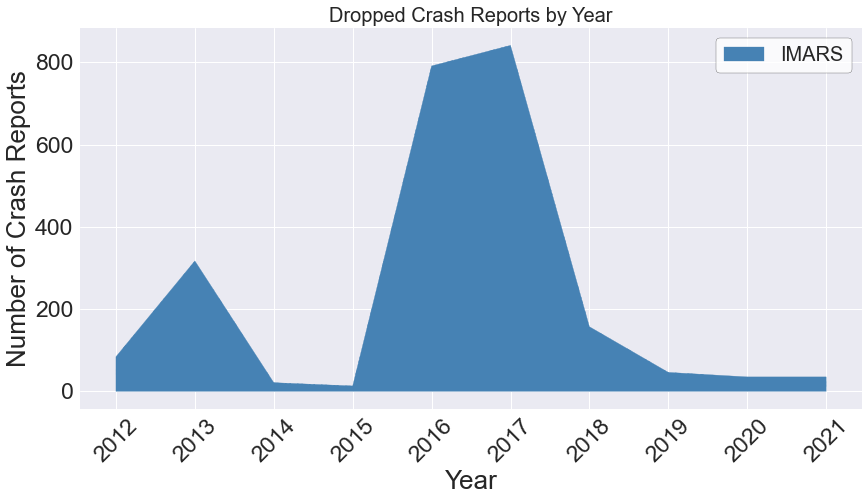

In [122]:
# practice plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
plt.style.use('seaborn')
#tick_spacing = 2 
#sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Dropped Crash Reports by Year', fontsize=20)
ax.fill_between(dropped_crashes_by_year['Year'], dropped_crashes_by_year['Crashes'], hatch='o', label = 'IMARS', color = "steelblue")
#ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Incapacitating Injury'], label = 'CDS with lat/long coordinates', 
#       hatch = 'x', facecolor = "skyblue")

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
#plt.xlim([1990,2021])
#plt.ylim([0,700])
#ax.set_yticks([0,100,200,300,400,500,600,700])
ax.grid('off')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
#ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Crash Reports", fontsize=26)

plt.show()

In [121]:
#percentage of crashes that were dropped from original dataset due to inability to identify a park name:
round(dropped_crashes.shape[0]/imars_crash_orig_NoDupsorNulls.shape[0]*100,2)

15.47

In [137]:
# determine dropped outcomes
dropped_crashes_merged = imars_passenger.merge(dropped_crashes, how='right', on='IMARS_Record_No')
dropped_crashes_merged.drop_duplicates()
dropped_outcomes = dropped_crashes_merged[['IMARS_Record_No','CRASH_YEAR']]
dropped_outcomes['Possible Injury']= np.where(dropped_crashes_merged['Injury_Severity']=='02. Possible injury', 1,0)
dropped_outcomes['Non-incapacitating Injury']= np.where(dropped_crashes_merged['Injury_Severity']=='03. Non-incapacitating injury', 1,0)
dropped_outcomes['Incapacitating Injury']= np.where(dropped_crashes_merged['Injury_Severity']=='04. Incapacitating injury', 1,0)
dropped_outcomes['Num_Fatalities']= np.where(dropped_crashes_merged['Injury_Severity']=='05. Fatal', 1,0)
dropped_outcomes['Num_Injuries']=dropped_outcomes['Possible Injury']+dropped_outcomes['Non-incapacitating Injury']+dropped_outcomes['Incapacitating Injury']
dropped_outcomes.head()
#dropped_crashes_agg = dropped_outcomes.groupby(by=['IMARS_Record_No']).sum().reset_index()
#dropped_crashes_agg.shape

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_20300\52441946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_outcomes['Possible Injury']= np.where(dropped_crashes_merged['Injury_Severity']=='02. Possible injury', 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_20300\52441946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_outcomes['Non-incapacitating Injury']= np.where(dropped_crashes_merged['Injury_Severity']=='03. Non-incapacitating injury', 1,0)
C:\Users\Sophie.Kaye\App

,IMARS_Record_No,CRASH_YEAR,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Num_Fatalities,Num_Injuries
0,NP12000078,2012,0,0,0,0,0
1,NP12000378,2012,0,0,0,0,0
2,NP12000550,2012,0,0,0,0,0
3,NP12000911,2012,0,0,0,0,0
4,NP12000935,2012,0,0,0,0,0


In [138]:
# number of dropped total injuries:
dropped_outcomes['Num_Injuries'].sum()

558

In [139]:
# number of dropped serious injuries:
dropped_outcomes['Incapacitating Injury'].sum()

93

In [140]:
# number of dropped fatalities:
dropped_outcomes['Num_Fatalities'].sum()

28

## Create new region column
imars_crash database currently contains two columns with region information, although neither one is fully populated. This section will create and populate a new column re-assigning region name to every crash based on park name using a lookup table

In [61]:
# load lookup table
park_info = pd.read_csv("./Reference Data/Park_Info_Table.csv")
park_info = park_info.rename(columns={'UNIT_CODE':'Park','REGION':'RGN'})
park_info.columns

Index(['OBJECTID', 'Park', 'GIS_Notes', 'UNIT_NAME', 'DATE_EDIT', 'STATE',
       'RGN', 'GNIS_ID', 'UNIT_TYPE', 'CREATED_BY', 'METADATA', 'PARKNAME',
       'CreationDa', 'Creator', 'EditDate', 'Editor', 'Shape__Are',
       'Shape__Len', 'Unnamed: 18'],
      dtype='object')

In [62]:
imars_crash_expanded.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Linked_Address_Classification',
       'City_Town_Park_Location', 'State', 'County', 'Direction',
       'Linked_Street_Number', 'Linked_Common_Name', 'Street_Type',
       'Direction.1', 'NEAR_Distance_to_MI', 'NEAR_Direction_To',
       'NEAR_Direction', 'NEAR_route_street_road_name', 'NEAR_Road_Type',
       'NEAR_Direction.1', 'AT_Intersection_route_street_road_DIRECTION',
       'At_Intersecting_route_street_road_name', 'AT_Road_Type',
       'AT_Direction', 'Mile_Marker', 'Latitude', 'Longitude', 'Region',
       'State_Zone', 'Park', 'Site', 'Place', 'Point',
       'Road_Type_Classification', 'Linked_Address', 'index_right', 'OBJECTID',
       'UNIT_CODE', 'GIS_Notes', 'UNIT_NAME', 'DATE_EDIT', 'STATE', 'REGION',
       'GNIS_ID', 'UNIT_TYPE', 'CREATED_BY', 'METADATA', 'PARKNAME',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'GlobalID',
       'Shape__Area', 'Shape__Length'],
      dtype='object')

In [63]:
# add RGN column from lookup table to IMARS crash database, joining the two datasets based on park name
imars_crash_expanded = pd.merge(imars_crash_expanded, park_info[['RGN','Park']], how='left', on='Park')
# resulting dataframe after join should have one additional column and no additional rows
imars_crash_expanded = imars_crash_expanded.drop_duplicates() 
imars_crash_expanded.shape

(12790, 53)

In [64]:
# check to see if any crashes were not assigned a region
imars_crash_expanded.loc[imars_crash_expanded['RGN'].isnull()].shape

(0, 53)

In [65]:
imars_crash_expanded['RGN'].value_counts()

SER    3541
PWR    2656
IMR    2642
NCR    2293
NER    1206
MWR     372
AKR      80
Name: RGN, dtype: int64

In [66]:
# remove partially populated pre-existing columns
imars_crash_expanded = imars_crash_expanded.drop(columns = ['Region', 'REGION'])

In [67]:
imars_crash_expanded.shape

(12790, 51)

In [68]:
imars_crash_expanded.to_csv("IMARS_crash_expanded.csv", index= False)

# Filter for Necessary Fields, Group by IMARS_RECORD_NO

## Passenger table

In [69]:
imars_passenger.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Driver_Action',
       'Driver_Condition', 'Driver_Distraction', 'Suspect_Alcohol',
       'Alcohol_Test', 'Alcohol_Test_Result_1', 'Alcohol_Test_Result_2',
       'Suspect_Drugs', 'Drug_Test', 'Violations_Issued', 'Seat_Position',
       'Injury_Severity', 'Air_Bag_Deployed', 'Ejection',
       'Injury_Transported_By', 'Safety_Equipment_Used', 'Vehicle_number',
       'Injured_transported_by', 'Non_motorist_safety_equipment',
       'Non_motorist_action_circumstance_prior_to_crash',
       'Non_motorist_action_circumstance_at_time_of_crash',
       'Non_motorist_condition_at_time_of_crash', 'Non_motorist_distraction',
       'Non_motorist_location_at_time_of_crash', 'Pedestrian_Type',
       'Pedestrian_Type_Detail', 'Involvement'],
      dtype='object')

In [70]:
# one person per passenger data entry
imars_passenger['NUM_OCC'] = 1
# rename column to match CDS column name
imars_passenger['INCID_NO'] = imars_passenger['IMARS_Record_No']

In [71]:
imars_passenger.shape

(27931, 31)

In [72]:
imars_passenger_slim = imars_passenger[['INCID_NO', 'NUM_OCC']]

In [73]:
imars_passenger_slim.shape

(27931, 2)

In [74]:
imars_passenger_slim.head()

,INCID_NO,NUM_OCC
0,NP12000078,1
1,NP12000378,1
2,NP12000550,1
3,NP12000911,1
4,NP12000935,1


In [75]:
imars_passenger['Injury_Severity'].value_counts().sort_index()

01. No injury                    13599
02. Possible injury               1826
03. Non-incapacitating injury     1163
04. Incapacitating injury          486
05. Fatal                          115
99. Unknown                       1470
Name: Injury_Severity, dtype: int64

In [76]:
# conservative estimate for total number of injuries (including possible injuries):
1826+1163+486

3475

In [77]:
#imars_passenger['Driver_Distraction'].value_counts().sort_index()

In [78]:
# total number of distracted motorists:
#20+17+76+166+378

In [79]:
#imars_passenger['Non_motorist_distraction'].value_counts().sort_index()

In [80]:
# total number of distracted non-motorists:
#2+1+2+16

In [81]:
# set flags for each injury severity
imars_passenger_slim['No Injury']= np.where(imars_passenger['Injury_Severity']=='01. No injury', 1,0)
imars_passenger_slim['Possible Injury']= np.where(imars_passenger['Injury_Severity']=='02. Possible injury', 1,0)
imars_passenger_slim['Non-incapacitating Injury']= np.where(imars_passenger['Injury_Severity']=='03. Non-incapacitating injury', 1,0)
imars_passenger_slim['Incapacitating Injury']= np.where(imars_passenger['Injury_Severity']=='04. Incapacitating injury', 1,0)
imars_passenger_slim['Fatality']= np.where(imars_passenger['Injury_Severity']=='05. Fatal', 1,0)
imars_passenger_slim['Unknown Injury']= np.where(imars_passenger['Injury_Severity']=='99. Unknown', 1,0)
#imars_passenger_slim['Motorist Distraction']= np.where(imars_passenger['Driver_Distraction'].isin(['02. Talking on electronic communication device','03. Texting on electronic communication device','04. Other electronic device (navigation, DVD player, etc.)','05. Other inside the vehicle (eating, personal hygiene, etc.)','06. Outside the vehicle (includes unspecified external distractions)']), 1,0)
#imars_passenger_slim['Non-motorist Distraction']= np.where(imars_passenger['Non_motorist_distraction'].isin(['02. Talking on electronic communications device','03. Texting on electronic communications device','04. Other electronic device (GPS, electronic music device, etc.)','05. Other distraction (looking at scenery, eating, day-dreaming, etc.)']), 1,0)

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\4255595523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_passenger_slim['No Injury']= np.where(imars_passenger['Injury_Severity']=='01. No injury', 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\4255595523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_passenger_slim['Possible Injury']= np.where(imars_passenger['Injury_Severity']=='02. Possible injury', 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\42

In [82]:
imars_passenger_slim.columns

Index(['INCID_NO', 'NUM_OCC', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Unknown Injury'],
      dtype='object')

In [83]:
# check new flag column against sum of distracted motorist attributes - looks good!
#imars_passenger_slim['Motorist Distraction'].sum()

In [84]:
# check new flag column against sum of distracted non-motorist attributes - looks good!
#imars_passenger_slim['Non-motorist Distraction'].sum()

In [85]:
# make sure all columns contain data as you would expect (i.e., 0 and 1)
#imars_passenger_slim.to_csv("./imars_passenger_slim_test.csv",index=False)

In [86]:
# create new column for number of fatalities to match CDS
imars_passenger_slim['Num_Fatalities'] = imars_passenger_slim['Fatality']
# check to make sure this matches the value count from above - looks good!
imars_passenger_slim['Num_Fatalities'].sum()

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2522495248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_passenger_slim['Num_Fatalities'] = imars_passenger_slim['Fatality']


115

In [87]:
# create new column for number of injuries to match CDS
imars_passenger_slim['Num_Injuries']=imars_passenger_slim['Possible Injury']+imars_passenger_slim['Non-incapacitating Injury']+imars_passenger_slim['Incapacitating Injury']
# check to make sure this matches the value count sum from above - looks good!
imars_passenger_slim['Num_Injuries'].sum()

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2008462746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_passenger_slim['Num_Injuries']=imars_passenger_slim['Possible Injury']+imars_passenger_slim['Non-incapacitating Injury']+imars_passenger_slim['Incapacitating Injury']


3475

In [88]:
imars_passenger_slim.head()

,INCID_NO,NUM_OCC,No Injury,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,Num_Fatalities,Num_Injuries
0,NP12000078,1,0,0,0,0,0,0,0,0
1,NP12000378,1,0,0,0,0,0,0,0,0
2,NP12000550,1,0,0,0,0,0,0,0,0
3,NP12000911,1,0,0,0,0,0,0,0,0
4,NP12000935,1,0,0,0,0,0,0,0,0


In [89]:
imars_passenger_slim.shape

(27931, 10)

In [90]:
# collapse multiple rows for each person involved in the crash into a single row for each crash
# occupancy, injuries, and fatalities should be summed as total numbers per crash ("sum" function)
imars_passenger_slim_agg = imars_passenger_slim.groupby(by=['INCID_NO']).sum().reset_index()

In [91]:
# result should be no more than 15302 rows (number of useable crash records)
imars_passenger_slim_agg.shape

(15302, 10)

In [92]:
imars_passenger_slim_agg.to_csv('./imars_passenger_slim_agg.csv', index=False)

## Crash Details Table

In [93]:
# rename column to match CDS column name
imars_crash_details['INCID_NO'] = imars_crash_details['IMARS_Record_No']

imars_crash_details_slim = imars_crash_details[['INCID_NO']]

In [94]:
# find relevant data attributes in the following columns for which to create flags

In [95]:
imars_crash_details['Injury_or_Fatal_Crash'].value_counts().sort_index()

01. Yes    2112
02. No     8842
Name: Injury_or_Fatal_Crash, dtype: int64

In [96]:
imars_crash_details['First_Harmful_Event_Type'].value_counts().sort_index()

Collision with animals                           1376
Collision with fixed object                      3990
Collision with person, MV or non-fixed object    6869
Non-collision                                    1897
Unknown                                           413
Name: First_Harmful_Event_Type, dtype: int64

In [97]:
pd.options.display.max_rows = 10000000
imars_crash_details['First_Harmful_Event'].value_counts().sort_index()

01. Overturn/rollover                                                     271
02. Fire/explosion                                                         18
03. Immersion                                                               9
04. Jackknife                                                               8
05. Cargo/equipment loss or shift                                          10
06. Separation of units                                                     8
07. Ran off the road right                                                797
08. Ran Off the road left                                                 259
09. Cross median or centerline                                             98
10. Downhill runaway                                                       22
11. Fell/jumped from motor vehicle                                         32
12. Avoiding an object on road                                             53
13. Avoiding an animal on road                                  

In [98]:
# total roadway departure crashes (right and left):
#797+259

In [99]:
# total VRU crashes (pedestrian, bike, and pedacycle):
71+103+1

175

In [100]:
# total "other accident class" crashes (i.e., cargo and maintenance equipment)
#27+30

In [101]:
imars_crash_details['Environmental_Contributing_Circumstances'].value_counts().sort_index()

01. None                                                                                    10032
01. None; 02. Weather                                                                           3
01. None; 03. Physical obstruction(s) (trees, bushes, etc.)                                     3
01. None; 05. Glare                                                                             1
01. None; 06. Animal(s) in roadway                                                              9
01. None; 06. Animal(s) in roadway; 99. Unknown                                                 1
01. None; 07. Other                                                                             6
01. None; 07. Other; 99. Unknown                                                                1
01. None; 99. Unknown                                                                          19
02. Weather                                                                                  1270
02. Weather; 03. Phy

In [102]:
#pd.options.mode.chained_assignment = None  # default='warn'
# set flags for each relevant data attribute
imars_crash_details_slim['Injury or Fatal']= np.where(imars_crash_details['Injury_or_Fatal_Crash']=="01. Yes", 1,0)
imars_crash_details_slim['Collision w Animal']= np.where(imars_crash_details['First_Harmful_Event_Type']=="Collision with animals", 1,0)
#imars_crash_details_slim['Collision w Fixed Object']= np.where(imars_crash_details['First_Harmful_Event_Type']=="Collision with fixed object", 1,0)
#imars_crash_details_slim['Non-Collision']= np.where(imars_crash_details['First_Harmful_Event_Type']=="Non-collision", 1,0)
#imars_crash_details_slim['Other Accident Class']= np.where(imars_crash_details['First_Harmful_Event'].isin(['23. Struck by falling, shifting cargo or anything set in motion by MV','24. Work zone/maintenance equipment']), 1,0)
#imars_crash_details_slim['Rollover']= np.where(imars_crash_details['First_Harmful_Event']=="01. Overturn/rollover", 1,0)
#imars_crash_details_slim['Collision w Other Vehicle']= np.where(imars_crash_details['First_Harmful_Event']=='21. Motor vehicle in transport', 1,0)
#imars_crash_details_slim['Collision w Parked Vehicle']= np.where(imars_crash_details['First_Harmful_Event']=="22. Parked motor vehicle", 1,0)
#imars_crash_details_slim['Collision w Train']= np.where(imars_crash_details['First_Harmful_Event']=="20. Railway vehicle", 1,0)
#imars_crash_details_slim['Collision w Other Object']= np.where(imars_crash_details['First_Harmful_Event']=="25. Other non-fixed object", 1,0)
#imars_crash_details_slim['Collision w Unknown']= np.where(imars_crash_details['First_Harmful_Event_Type']=="Unknown",1,0)
#imars_crash_details_slim['Roadway Departure']= np.where(imars_crash_details['First_Harmful_Event'].isin(['07. Ran off the road right','08. Ran Off the road left']), 1,0)
imars_crash_details_slim['Avoiding Animal']= np.where(imars_crash_details['First_Harmful_Event']=="13. Avoiding an animal on road", 1,0)
#imars_crash_details_slim['Falling Object']= np.where(imars_crash_details['First_Harmful_Event']=="14. Thrown or falling object", 1,0)
imars_crash_details_slim['Pedestrian']= np.where(imars_crash_details['First_Harmful_Event']=="17. Pedestrian", 1,0)
imars_crash_details_slim['Bicycle']= np.where(imars_crash_details['First_Harmful_Event']=="18. Bicycle", 1,0)
imars_crash_details_slim['Pedacycle']= np.where(imars_crash_details['First_Harmful_Event']=="19. Other pedacycle", 1,0)
imars_crash_details_slim['VRU']= np.where(imars_crash_details['First_Harmful_Event'].isin(['17. Pedestrian','18. Bicycle','19. Other pedacycle']), 1,0)
imars_crash_details_slim['HorseLlama']= np.where(imars_crash_details['First_Harmful_Event']=="26. Horse/llama", 1,0)
imars_crash_details_slim['Cow']= np.where(imars_crash_details['First_Harmful_Event']=="27. Cow", 1,0)
imars_crash_details_slim['Deer']= np.where(imars_crash_details['First_Harmful_Event']=="28. Deer", 1,0)
imars_crash_details_slim['Elk']= np.where(imars_crash_details['First_Harmful_Event']=="29. Elk", 1,0)
imars_crash_details_slim['Moose']= np.where(imars_crash_details['First_Harmful_Event']=="30. Moose", 1,0)
imars_crash_details_slim['Buffalo']= np.where(imars_crash_details['First_Harmful_Event']=="31. Buffalo", 1,0)
imars_crash_details_slim['Bear']= np.where(imars_crash_details['First_Harmful_Event']=="32. Bear", 1,0)
imars_crash_details_slim['Antelope']= np.where(imars_crash_details['First_Harmful_Event']=="33. Antelope", 1,0)
imars_crash_details_slim['SheepGoats']= np.where(imars_crash_details['First_Harmful_Event']=="34. Sheep/goats", 1,0)
imars_crash_details_slim['OtherWild']= np.where(imars_crash_details['First_Harmful_Event']=="36. Other wild animal (crocodile, birds, coyote, etc.)", 1,0)
imars_crash_details_slim['OtherDomestic']= np.where(imars_crash_details['First_Harmful_Event']=='37. Other domestic (dog, cat, etc.)', 1,0)
#imars_crash_details_slim['Rock in Roadway']= np.where(imars_crash_details['First_Harmful_Event']=='60. Rock, boulder, rock slide', 1,0)
imars_crash_details_slim['Animal in Roadway']= np.where(imars_crash_details['Environmental_Contributing_Circumstances'].str.contains("Animal")==True, 1,0)
#imars_crash_details_slim['Rockfall']= np.where(imars_crash_details['Environmental_Contributing_Circumstances'].str.contains("Rockfall")==True, 1,0)

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2443862770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_crash_details_slim['Injury or Fatal']= np.where(imars_crash_details['Injury_or_Fatal_Crash']=="01. Yes", 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2443862770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_crash_details_slim['Collision w Animal']= np.where(imars_crash_details['First_Harmful_Event_Type']=="Collision with animals", 1,0)
C:\Users\Sophie.Kaye\

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2443862770.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_crash_details_slim['Animal in Roadway']= np.where(imars_crash_details['Environmental_Contributing_Circumstances'].str.contains("Animal")==True, 1,0)


In [103]:
# total number of animal-related crashes, assuming only one field was checked for each crash:
# (real total likely to be lower in cases where more than one field was checked per crash)
imars_crash_details_slim['Collision w Animal'].sum()+imars_crash_details_slim['Avoiding Animal'].sum()+imars_crash_details_slim['Animal in Roadway'].sum()

2513

In [104]:
# combine animal related attributes into a single column to string search for relevant data attributes
animal_related = imars_crash_details_slim[['Collision w Animal', 'Avoiding Animal', 'Animal in Roadway']]
imars_crash_details_slim['Animal Related'] = animal_related.apply(
   lambda x: ','.join(x.dropna().astype(str)),
  axis=1
)
imars_crash_details_slim['Animal Related']

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\2292035720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_crash_details_slim['Animal Related'] = animal_related.apply(


0        0,0,0
1        0,0,0
2        0,0,0
3        0,0,0
4        0,0,0
5        0,0,0
6        0,0,0
7        0,0,0
8        0,0,0
9        0,0,0
10       0,0,0
11       0,0,0
12       0,0,0
13       0,0,0
14       0,0,0
15       0,0,0
16       0,0,0
17       0,0,0
18       0,0,0
19       0,0,0
20       0,0,0
21       0,0,0
22       0,0,0
23       0,0,0
24       0,0,0
25       0,0,0
26       0,0,0
27       0,0,0
28       0,0,0
29       0,0,0
30       0,0,0
31       0,0,0
32       0,0,0
33       0,0,0
34       0,0,0
35       0,0,0
36       0,0,0
37       0,0,0
38       0,0,0
39       0,0,0
40       0,0,0
41       0,0,0
42       0,0,0
43       0,0,0
44       0,0,0
45       0,0,0
46       0,0,0
47       0,0,0
48       0,0,0
49       0,0,0
50       0,0,0
51       0,0,0
52       0,0,0
53       0,0,0
54       0,0,0
55       0,0,0
56       0,0,0
57       0,0,0
58       0,0,0
59       0,0,0
60       0,0,0
61       0,0,0
62       0,0,0
63       0,0,0
64       0,0,0
65       0,0,0
66       0

In [105]:
imars_crash_details_slim['Involving Animal']=np.where(imars_crash_details_slim['Animal Related'].str.contains('1')==True,1,0)
imars_crash_details_slim['Involving Animal'].value_counts() # seems reasonable!

C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\3320517606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_crash_details_slim['Involving Animal']=np.where(imars_crash_details_slim['Animal Related'].str.contains('1')==True,1,0)


0    13647
1     1655
Name: Involving Animal, dtype: int64

In [106]:
imars_crash_details_slim.columns

Index(['INCID_NO', 'Injury or Fatal', 'Collision w Animal', 'Avoiding Animal',
       'Pedestrian', 'Bicycle', 'Pedacycle', 'VRU', 'HorseLlama', 'Cow',
       'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'SheepGoats',
       'OtherWild', 'OtherDomestic', 'Animal in Roadway', 'Animal Related',
       'Involving Animal'],
      dtype='object')

In [107]:
# remove intermediate columns used to set flags
imars_crash_details_slim = imars_crash_details_slim.drop(columns = ['Collision w Animal', 'Avoiding Animal', 'Animal in Roadway','Animal Related'])

In [108]:
pd.options.display.max_columns = 10000000
imars_crash_details_slim.head()

,INCID_NO,Injury or Fatal,Pedestrian,Bicycle,Pedacycle,VRU,HorseLlama,Cow,Deer,Elk,Moose,Buffalo,Bear,Antelope,SheepGoats,OtherWild,OtherDomestic,Involving Animal
0,NP12000078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NP12000378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NP12000550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NP12000911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NP12000935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
# check to make sure this matches the value count sum from above - looks good!
#imars_crash_details_slim['Roadway Departure'].sum()

In [110]:
# check to make sure this matches the value count sum from above - looks good!
imars_crash_details_slim['VRU'].sum()

175

In [111]:
# check to make sure this matches the value count sum from above - looks good!
#imars_crash_details_slim['Other Accident Class'].sum()

In [112]:
# check new flag column sum against value counts - looks good!
#imars_crash_details_slim['Animal in Roadway'].sum()

In [113]:
# check new flag column sum against value counts - looks good!
#imars_crash_details_slim['Collision w Animal'].sum()

In [114]:
imars_crash_details_slim.shape

(15302, 18)

In [115]:
imars_crash_details_slim.columns

Index(['INCID_NO', 'Injury or Fatal', 'Pedestrian', 'Bicycle', 'Pedacycle',
       'VRU', 'HorseLlama', 'Cow', 'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear',
       'Antelope', 'SheepGoats', 'OtherWild', 'OtherDomestic',
       'Involving Animal'],
      dtype='object')

In [116]:
# make sure all columns contain data as you would expect (i.e., 0 and 1)
#imars_crash_details_slim.to_csv("./imars_crash_details_slim_test.csv",index=False)

## Vehicle Table

In [117]:
imars_vehicle.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Vehicle_Number',
       'Number_of_Occupants', 'Vehicle_Towed', 'Insurance_verified',
       'Initial_Impact_Point', 'Most_Damaged_Area', 'Extent_of_Damage',
       'Direction_of_Travel_Prior_to_Crash', 'Posted_Speed',
       'First_Event_Type', 'First_Event', 'Second_Event_Type', 'Second_Event',
       'Third_Event_Type', 'Third_Event', 'Fourth_Event_Type', 'Fourth_Event',
       'Motor_Vehicle_Unit_Type', 'Vehicle_Owner', 'Vehicle_Type',
       'Non_Commercial_Trailer_Style', 'Emergency_Vehicle_Use',
       'Emergency_Equipment_Activated', 'Special_Function_of_MV_in_Transport',
       'Motor_Vehicle_Contributing_Circumstance',
       'Vehicle_Maneuver_Action_Prior_to_Crash', 'Road_Surface', 'Grade',
       'Roadway_Alignment', 'Total_Number_of_Lanes', 'Traffic_Control',
       'Traffic_Control_Working_Properly', 'Roadway_Description',
       'Commercial_Non_Commercial', 'Number_of_Axles', 'Gross_Vehicle_Weight',
       'Combination_GVW', 

In [118]:
imars_vehicle.shape

(23576, 51)

In [119]:
# rename column to match CDS column name
imars_vehicle['INCID_NO'] = imars_vehicle['IMARS_Record_No']
imars_vehicle_slim = imars_vehicle[['INCID_NO']]
imars_vehicle_slim.head()

,INCID_NO
0,NP12000078
1,NP12000378
2,NP12000550
3,NP12000911
4,NP12000935


In [120]:
imars_vehicle['Traffic_Control'].value_counts().sort_index()

01. None                                      12723
02. Stop sign                                   926
03. Yield sign                                  232
04. Flashing traffic signal                      28
05. Traffic signal                              790
06. Pedestrian crossing                         155
07. Person (ofc/flagger, xing guard, etc.)       91
08. No passing zone                            1246
09. Warning signs                               253
10. Temporary traffic control                   135
12. RR crossing device/signal                     5
13. Other                                       527
99. Unknown                                    1198
Name: Traffic_Control, dtype: int64

In [121]:
# number of vehicle entries in which a crash occurred at a known site other than a crosswalk (or person)
12723+926+232+28+790+1246+253+135+5+527

16865

In [122]:
# set flags for each relevant data attribute
imars_vehicle_slim['5_mph']= np.where(imars_vehicle['Posted_Speed']=='01. 5 mph', 1,0)
imars_vehicle_slim['10_mph']= np.where(imars_vehicle['Posted_Speed']=='02. 10 mph', 1,0)
imars_vehicle_slim['15_mph']= np.where(imars_vehicle['Posted_Speed']=='03. 15 mph', 1,0)
imars_vehicle_slim['20_mph']= np.where(imars_vehicle['Posted_Speed']=='04. 20 mph', 1,0)
imars_vehicle_slim['25_mph']= np.where(imars_vehicle['Posted_Speed']=='05. 25 mph', 1,0)
imars_vehicle_slim['30_mph']= np.where(imars_vehicle['Posted_Speed']=='06. 30 mph', 1,0)
imars_vehicle_slim['35_mph']= np.where(imars_vehicle['Posted_Speed']=='07. 35 mph', 1,0)
imars_vehicle_slim['40_mph']= np.where(imars_vehicle['Posted_Speed']=='08. 40 mph', 1,0)
imars_vehicle_slim['45_mph']= np.where(imars_vehicle['Posted_Speed']=='09. 45 mph', 1,0)
imars_vehicle_slim['50_mph']= np.where(imars_vehicle['Posted_Speed']=='10. 50 mph', 1,0)
imars_vehicle_slim['55_mph']= np.where(imars_vehicle['Posted_Speed']=='11. 55 mph', 1,0)
imars_vehicle_slim['60_mph']= np.where(imars_vehicle['Posted_Speed']=='12. 60 mph', 1,0)
imars_vehicle_slim['65_mph']= np.where(imars_vehicle['Posted_Speed']=='13. 65 mph', 1,0)
imars_vehicle_slim['70_mph']= np.where(imars_vehicle['Posted_Speed']=='14. 70 mph', 1,0)
imars_vehicle_slim['75_mph']= np.where(imars_vehicle['Posted_Speed']=='15. 75 mph', 1,0)
imars_vehicle_slim['no_posted_speed']= np.where(imars_vehicle['Posted_Speed']=='98. Not posted', 1,0)
imars_vehicle_slim['Crosswalk']= np.where(imars_vehicle['Traffic_Control']=='06. Pedestrian crossing', 1,0)
imars_vehicle_slim['Outside a Crosswalk']= np.where(imars_vehicle['Traffic_Control'].isin(['01. None','02. Stop sign','03. Yield sign','04. Flashing traffic signal','05. Traffic signal','08. No passing zone','09. Warning signs','10. Temporary traffic control','12. RR crossing device/signal','13. Other']), 1,0)


C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\811227323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_vehicle_slim['5_mph']= np.where(imars_vehicle['Posted_Speed']=='01. 5 mph', 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\811227323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imars_vehicle_slim['10_mph']= np.where(imars_vehicle['Posted_Speed']=='02. 10 mph', 1,0)
C:\Users\Sophie.Kaye\AppData\Local\Temp\ipykernel_23924\811227323.py:4: SettingWithCopyWarning: 
A v

In [123]:
# check against value count sum from above - looks good!
imars_vehicle_slim['Outside a Crosswalk'].sum()

16865

In [124]:
# check new flag column sum against value counts - looks good!
imars_vehicle_slim['Crosswalk'].sum()

155

In [125]:
imars_vehicle_slim.head()

,INCID_NO,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,45_mph,50_mph,55_mph,60_mph,65_mph,70_mph,75_mph,no_posted_speed,Crosswalk,Outside a Crosswalk
0,NP12000078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NP12000378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NP12000550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NP12000911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NP12000935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
imars_vehicle_slim.shape

(23576, 19)

In [127]:
imars_vehicle_slim.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'Crosswalk',
       'Outside a Crosswalk'],
      dtype='object')

In [128]:
# make sure all columns contain data as you would expect (i.e., 0 and 1)
#imars_vehicle_slim.to_csv("./imars_vehicle_slim_test.csv",index=False)

In [129]:
# collapse multiple rows for each vehicle involved in the crash into a single row for each crash
# only one speed limit or crosswalk flag should exist per crash to not double count data attribute ("first" function)
imars_vehicle_slim_agg = imars_vehicle_slim.groupby(by=['INCID_NO']).first().reset_index()

In [130]:
# result should be no more than 15302 rows (number of useable crash records)
imars_vehicle_slim_agg.shape

(15302, 19)

## Crash Table 

In [131]:
imars_crash_expanded.columns

Index(['IMARS_Record_No', 'Crash_Date_Time', 'Linked_Address_Classification',
       'City_Town_Park_Location', 'State', 'County', 'Direction',
       'Linked_Street_Number', 'Linked_Common_Name', 'Street_Type',
       'Direction.1', 'NEAR_Distance_to_MI', 'NEAR_Direction_To',
       'NEAR_Direction', 'NEAR_route_street_road_name', 'NEAR_Road_Type',
       'NEAR_Direction.1', 'AT_Intersection_route_street_road_DIRECTION',
       'At_Intersecting_route_street_road_name', 'AT_Road_Type',
       'AT_Direction', 'Mile_Marker', 'Latitude', 'Longitude', 'State_Zone',
       'Park', 'Site', 'Place', 'Point', 'Road_Type_Classification',
       'Linked_Address', 'index_right', 'OBJECTID', 'UNIT_CODE', 'GIS_Notes',
       'UNIT_NAME', 'DATE_EDIT', 'STATE', 'GNIS_ID', 'UNIT_TYPE', 'CREATED_BY',
       'METADATA', 'PARKNAME', 'CreationDate', 'Creator', 'EditDate', 'Editor',
       'GlobalID', 'Shape__Area', 'Shape__Length', 'RGN'],
      dtype='object')

In [132]:
imars_crash_expanded.head()

,IMARS_Record_No,Crash_Date_Time,Linked_Address_Classification,City_Town_Park_Location,State,County,Direction,Linked_Street_Number,Linked_Common_Name,Street_Type,Direction.1,NEAR_Distance_to_MI,NEAR_Direction_To,NEAR_Direction,NEAR_route_street_road_name,NEAR_Road_Type,NEAR_Direction.1,AT_Intersection_route_street_road_DIRECTION,At_Intersecting_route_street_road_name,AT_Road_Type,AT_Direction,Mile_Marker,Latitude,Longitude,State_Zone,Park,Site,Place,Point,Road_Type_Classification,Linked_Address,index_right,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,RGN
0,NP13031262,20130615 14:00:00:000,Dispatch address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,BUFF,NaN,NaN,NaN,Highway/road/alley (includes street),NEAR THE OLD SIGN BUFFALO POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MWR
1,NP13054509,20130803 10:56:00:000,Dispatch address,NaN,SD,NaN,NaN,NaN,PPI-ENTRANCE/EXIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,MORU,NaN,NaN,NaN,Highway/road/alley (includes street),PPI-ENTRANCE/EXIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MWR
2,NP13071209,20130905 12:03:00:000,Dispatch address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Convenience store,BM WAYSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER
3,NP13082489,20131006 09:10:00:000,Dispatch address,NaN,VA,NaN,NaN,NaN,MP97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Highway/road/alley (includes street),MP97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER
4,NP13082534,20131006 11:42:00:000,Dispatch address,NaN,VA,NaN,NaN,NaN,MP102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Highway/road/alley (includes street),MP102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER


In [133]:
# reformat crash date, time, and year; separate into individual columns
imars_crash_expanded['Crash_Date_Time']=pd.to_datetime(imars_crash_expanded['Crash_Date_Time'], 
                                                   format='%Y%m%d %H:%M:%S:%f')
imars_crash_expanded['CRASH_DATE'] = imars_crash_expanded['Crash_Date_Time'].dt.strftime('%Y-%m-%d')
imars_crash_expanded['CRASH_TIME'] = imars_crash_expanded['Crash_Date_Time'].dt.strftime('%H%M')
imars_crash_expanded['CRASH_YEAR'] = imars_crash_expanded['Crash_Date_Time'].dt.strftime('%Y')
imars_crash_expanded.head()

,IMARS_Record_No,Crash_Date_Time,Linked_Address_Classification,City_Town_Park_Location,State,County,Direction,Linked_Street_Number,Linked_Common_Name,Street_Type,Direction.1,NEAR_Distance_to_MI,NEAR_Direction_To,NEAR_Direction,NEAR_route_street_road_name,NEAR_Road_Type,NEAR_Direction.1,AT_Intersection_route_street_road_DIRECTION,At_Intersecting_route_street_road_name,AT_Road_Type,AT_Direction,Mile_Marker,Latitude,Longitude,State_Zone,Park,Site,Place,Point,Road_Type_Classification,Linked_Address,index_right,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,2013-06-15 14:00:00,Dispatch address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,BUFF,NaN,NaN,NaN,Highway/road/alley (includes street),NEAR THE OLD SIGN BUFFALO POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MWR,2013-06-15,1400,2013
1,NP13054509,2013-08-03 10:56:00,Dispatch address,NaN,SD,NaN,NaN,NaN,PPI-ENTRANCE/EXIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,MORU,NaN,NaN,NaN,Highway/road/alley (includes street),PPI-ENTRANCE/EXIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MWR,2013-08-03,1056,2013
2,NP13071209,2013-09-05 12:03:00,Dispatch address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Convenience store,BM WAYSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER,2013-09-05,1203,2013
3,NP13082489,2013-10-06 09:10:00,Dispatch address,NaN,VA,NaN,NaN,NaN,MP97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Highway/road/alley (includes street),MP97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER,2013-10-06,0910,2013
4,NP13082534,2013-10-06 11:42:00,Dispatch address,NaN,VA,NaN,NaN,NaN,MP102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,SHEN,NaN,NaN,NaN,Highway/road/alley (includes street),MP102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NER,2013-10-06,1142,2013


In [134]:
# cleaned data, all original rows and columns
imars_crash_expanded.to_csv("./IMARS_crash_full.csv",index=False)

In [135]:
# rename column to match CDS column name
imars_crash_expanded['INCID_NO'] = imars_crash_expanded['IMARS_Record_No']
# parse out crucial basic crash info 
imars_crash_slim = imars_crash_expanded[['INCID_NO','Latitude','Longitude','Park','RGN','CRASH_DATE','CRASH_TIME','CRASH_YEAR']]
imars_crash_slim = imars_crash_slim.rename(columns={'Latitude':'LATITUDE','Longitude':'LONGITUDE'})

In [136]:
imars_crash_slim.shape

(12790, 8)

In [137]:
# cleaned data, basic crash info columns
imars_crash_slim.to_csv("./IMARS_crash_slim.csv",index=False)

## merge crash table with other IMARS tables

In [138]:
imars_passenger_merged = imars_passenger.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_passenger_merged.drop_duplicates() 
imars_passenger_merged.head()

,IMARS_Record_No,Crash_Date_Time,Driver_Action,Driver_Condition,Driver_Distraction,Suspect_Alcohol,Alcohol_Test,Alcohol_Test_Result_1,Alcohol_Test_Result_2,Suspect_Drugs,Drug_Test,Violations_Issued,Seat_Position,Injury_Severity,Air_Bag_Deployed,Ejection,Injury_Transported_By,Safety_Equipment_Used,Vehicle_number,Injured_transported_by,Non_motorist_safety_equipment,Non_motorist_action_circumstance_prior_to_crash,Non_motorist_action_circumstance_at_time_of_crash,Non_motorist_condition_at_time_of_crash,Non_motorist_distraction,Non_motorist_location_at_time_of_crash,Pedestrian_Type,Pedestrian_Type_Detail,Involvement,NUM_OCC,INCID_NO,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,20130615 14:00:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NP13031262,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,20130803 10:56:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NP13054509,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,20130905 12:03:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NP13071209,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,20131006 09:10:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NP13082489,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,20131006 11:42:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NP13082534,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [139]:
imars_passenger_merged.shape

(22997, 38)

In [140]:
# cleaned, non-aggregated dataset (one row per person involved, all original columns) merged to include basic crash info columns
imars_passenger_merged.to_csv("./IMARS_passenger_full.csv",index=False)

In [141]:
imars_passenger_slim_merged = imars_passenger_slim_agg.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_passenger_slim_merged.drop_duplicates() 
# result should have no more than 12790 rows and exactly passenger_slim + crash_slim -1 columns (17)
imars_passenger_slim_merged.shape

(12790, 17)

In [142]:
imars_passenger_slim_merged.head()

,INCID_NO,NUM_OCC,No Injury,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,Num_Fatalities,Num_Injuries,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,1,0,0,0,0,0,0,0,0,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,1,0,0,0,0,0,0,0,0,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,1,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,1,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,1,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [143]:
# cleaned and aggregated distilled dataset (one row per crash, only columns of interest) merged to include basic crash info
imars_passenger_slim_merged.to_csv("./IMARS_passenger_slim.csv",index=False)

In [144]:
# determine number of (mostly) null rows
imars_passenger_slim_merged_null = imars_passenger_slim_merged.loc[imars_passenger_slim_merged['Fatality'].isnull()==True]
imars_passenger_slim_merged_null.shape

(0, 17)

In [145]:
# 0 crashes are missing passenger table entries

In [146]:
imars_vehicle_merged = imars_vehicle.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_vehicle_merged.drop_duplicates() 
imars_vehicle_merged.head()

,IMARS_Record_No,Crash_Date_Time,Vehicle_Number,Number_of_Occupants,Vehicle_Towed,Insurance_verified,Initial_Impact_Point,Most_Damaged_Area,Extent_of_Damage,Direction_of_Travel_Prior_to_Crash,Posted_Speed,First_Event_Type,First_Event,Second_Event_Type,Second_Event,Third_Event_Type,Third_Event,Fourth_Event_Type,Fourth_Event,Motor_Vehicle_Unit_Type,Vehicle_Owner,Vehicle_Type,Non_Commercial_Trailer_Style,Emergency_Vehicle_Use,Emergency_Equipment_Activated,Special_Function_of_MV_in_Transport,Motor_Vehicle_Contributing_Circumstance,Vehicle_Maneuver_Action_Prior_to_Crash,Road_Surface,Grade,Roadway_Alignment,Total_Number_of_Lanes,Traffic_Control,Traffic_Control_Working_Properly,Roadway_Description,Commercial_Non_Commercial,Number_of_Axles,Gross_Vehicle_Weight,Combination_GVW,Commercial_Cargo_Body_Type,Commercial_Cargo,Commercial_MV_Configuration,Identification_Number_Type,Hazmat_1_Class,Hazmat_1_ID,Hazmat_2_Class,Hazmat_2_ID,Hazmat_3_Class,Hazmat_3_ID,Hazmat_4_Class,Hazmat_4_ID,INCID_NO,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,20130615 14:00:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13031262,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,20130803 10:56:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13054509,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,20130905 12:03:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13071209,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,20131006 09:10:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13082489,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,20131006 11:42:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13082534,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [147]:
imars_vehicle_merged.shape

(19455, 59)

In [148]:
# cleaned, non-aggregated dataset (one row per vehicle involved, all original columns) merged to include basic crash info
imars_vehicle_merged.to_csv("./IMARS_vehicle_full.csv",index=False)

In [149]:
imars_vehicle_slim_merged = imars_vehicle_slim_agg.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_vehicle_slim_merged.drop_duplicates() 
# result should have no more than 12790 rows and exactly vehicle_slim + crash_slim -1 columns (26)
imars_vehicle_slim_merged.shape

(12790, 26)

In [150]:
imars_vehicle_slim_merged.head()

,INCID_NO,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,45_mph,50_mph,55_mph,60_mph,65_mph,70_mph,75_mph,no_posted_speed,Crosswalk,Outside a Crosswalk,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [151]:
# cleaned and aggregated dataset (one row per crash, only columns of interest) merged to include basic crash info
imars_vehicle_slim_merged.to_csv("./IMARS_vehicle_slim.csv",index=False)

In [152]:
# determine number of (mostly) null rows
imars_vehicle_slim_merged_null = imars_vehicle_slim_merged.loc[imars_vehicle_slim_merged['35_mph'].isnull()==True]
imars_vehicle_slim_merged_null.shape

(0, 26)

In [153]:
# 0 crashes are missing vehicle table entries

In [154]:
imars_crash_details_merged = imars_crash_details.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_crash_details_merged.drop_duplicates(subset=['INCID_NO']) 
imars_crash_details_merged.head()

,IMARS_Record_No,Crash_Date_Time,Number_of_Vehicles_Involved,Injury_or_Fatal_Crash,Investigated_at_Scene,Hit_and_Run,Non_Motor_Vehicl_Property_Damage,Amount_of_Property_Damage,First_Harmful_Event_Type,First_Harmful_Event,Location_of_First_Harmful_Event,Weather,Roadway_Condition,Lighting,School_Bus_related,AS_Road_Circumstance,Environmental_Contributing_Circumstances,Work_Zone_Related,Work_Zone_Workers_Present,Work_Zone_Location,Law_Enforcement_Present_at_Work_Zone,Relation_to_Junction,Type_of_Intersection,Manner_of_Collision,INCID_NO,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,20130615 14:00:00:000,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99. Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99. Unknown,99. Unknown,NP13031262,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,20130803 10:56:00:000,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99. Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99. Unknown,NP13054509,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,20130905 12:03:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13071209,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,20131006 09:10:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13082489,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,20131006 11:42:00:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP13082534,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [155]:
imars_crash_details_merged.shape

(12790, 32)

In [156]:
# cleaned data, all original rows and columns
imars_crash_details_merged.to_csv("./IMARS_crash_details_full.csv",index=False)

In [157]:
imars_crash_details_slim_merged = imars_crash_details_slim.merge(imars_crash_slim, how='right', on='INCID_NO')
imars_crash_details_slim_merged.drop_duplicates(subset=['INCID_NO']) 
# result should have no more than 12790 rows and exactly crash_details_slim + crash_slim -1 columns (25)
imars_crash_details_slim_merged.shape

(12790, 25)

In [158]:
imars_crash_details_slim_merged.head()

,INCID_NO,Injury or Fatal,Pedestrian,Bicycle,Pedacycle,VRU,HorseLlama,Cow,Deer,Elk,Moose,Buffalo,Bear,Antelope,SheepGoats,OtherWild,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR
0,NP13031262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013
1,NP13054509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,MORU,MWR,2013-08-03,1056,2013
2,NP13071209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-09-05,1203,2013
3,NP13082489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,0910,2013
4,NP13082534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,1142,2013


In [159]:
# cleaned data, all rows, but only columns of interest
imars_crash_details_slim_merged.to_csv("./IMARS_crash_details_slim.csv",index=False)

In [160]:
# determine number of (mostly) null rows
imars_crash_details_slim_merged_null = imars_crash_details_slim_merged.loc[imars_crash_details_slim_merged['Injury or Fatal'].isnull()==True]
imars_crash_details_slim_merged_null.shape

(0, 25)

In [161]:
# 0 crashes are missing crash details table entries

## merge all IMARS slim (agg) tables into clean dataset for combination with CDS

In [162]:
imars_passenger_slim_agg.shape, imars_vehicle_slim_agg.shape, imars_crash_details_slim.shape, imars_crash_slim.shape

((15302, 10), (15302, 19), (15302, 18), (12790, 8))

In [163]:
# the number of rows in the final dataset should be:
imars_crash_slim.shape[0]

12790

In [164]:
# the number of columns in the final dataset should be:
10+19+18+8-3+1

53

In [165]:
imars_slim_passenger_and_vehicle=imars_vehicle_slim_agg.merge(imars_passenger_slim_agg, how='right', on='INCID_NO')
imars_slim_passenger_vehicle_details=imars_slim_passenger_and_vehicle.merge(imars_crash_details_slim, how='right', on='INCID_NO')
imars_slim_all=imars_slim_passenger_vehicle_details.merge(imars_crash_slim, how="right", on='INCID_NO')
imars_slim_all.drop_duplicates()
# add column for name of database
imars_slim_all['database']='IMARS'
# for Chris, to analyze data quality for all crashes with cleaned lat/long, park, and region georeferences, regardless of if all non-crash tables have records for each crash:
imars_slim_all.to_csv("./IMARS_slim_clean_forChris.csv",index=False)
imars_slim_all.shape

(12790, 53)

In [166]:
## drop rows with missing passenger or vehicle table entries, such that all final data have records in all tables
#imars_slim_alltablespopulated = imars_slim_all[imars_slim_all['35_mph'].notna()]
#imars_slim_alltablespopulated.shape

In [167]:
imars_slim_all.head()

,INCID_NO,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,45_mph,50_mph,55_mph,60_mph,65_mph,70_mph,75_mph,no_posted_speed,Crosswalk,Outside a Crosswalk,NUM_OCC,No Injury,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,Num_Fatalities,Num_Injuries,Injury or Fatal,Pedestrian,Bicycle,Pedacycle,VRU,HorseLlama,Cow,Deer,Elk,Moose,Buffalo,Bear,Antelope,SheepGoats,OtherWild,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR,database
0,NP13031262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,BUFF,MWR,2013-06-15,1400,2013,IMARS
1,NP13054509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,MORU,MWR,2013-08-03,1056,2013,IMARS
2,NP13071209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-09-05,1203,2013,IMARS
3,NP13082489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,0910,2013,IMARS
4,NP13082534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,SHEN,NER,2013-10-06,1142,2013,IMARS


In [168]:
imars_slim_all.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'Crosswalk',
       'Outside a Crosswalk', 'NUM_OCC', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Unknown Injury', 'Num_Fatalities', 'Num_Injuries', 'Injury or Fatal',
       'Pedestrian', 'Bicycle', 'Pedacycle', 'VRU', 'HorseLlama', 'Cow',
       'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'SheepGoats',
       'OtherWild', 'OtherDomestic', 'Involving Animal', 'LATITUDE',
       'LONGITUDE', 'Park', 'RGN', 'CRASH_DATE', 'CRASH_TIME', 'CRASH_YEAR',
       'database'],
      dtype='object')

In [169]:
imars_slim_all.to_csv("./IMARS_slim_clean.csv",index=False)